In [1]:
%matplotlib inline
import seaborn # import before other plotting libraries
import numpy, scipy, matplotlib.pyplot as plt, librosa, librosa.display, sklearn, urllib, IPython.display, stanford_mir
plt.rcParams['figure.figsize'] = (14,5)

[&larr; Back to Index](index.html)

# Basic Feature Extraction

Somehow, we must extract the characteristics of our audio signal that are most relevant to the problem we are trying to solve. For example, if we want to classify instruments by timbre, we will want features that distinguish sounds by their timbre and not their pitch. If we want to perform pitch detection, we want features that distinguish pitch and not timbre.

This process is known as feature extraction.

Let's begin with twenty audio files: ten kick drum samples, and ten snare drum samples. Each audio file contains one drum hit.

For convenience, we will use `stanford_mir.download_samples` to download this data set at once.

In [2]:
kick_filepaths, snare_filepaths = stanford_mir.download_samples(collection="drum_samples_train")

Read and store each signal:

In [3]:
kick_signals = [
    librosa.load(p)[0] for p in kick_filepaths
]
snare_signals = [
    librosa.load(p)[0] for p in snare_filepaths
]

Display the kick drum signals:

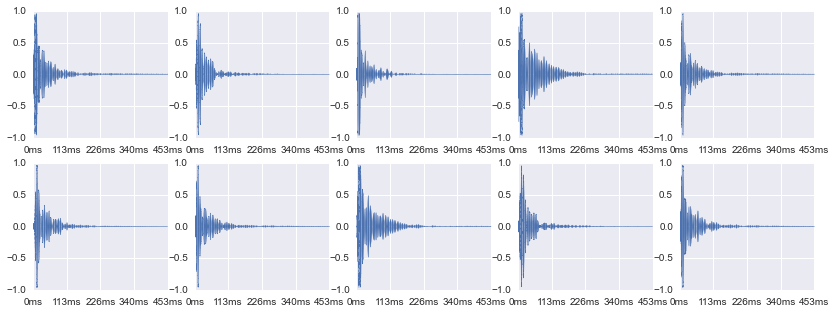

In [4]:
for i, x in enumerate(kick_signals):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

Display the snare drum signals:

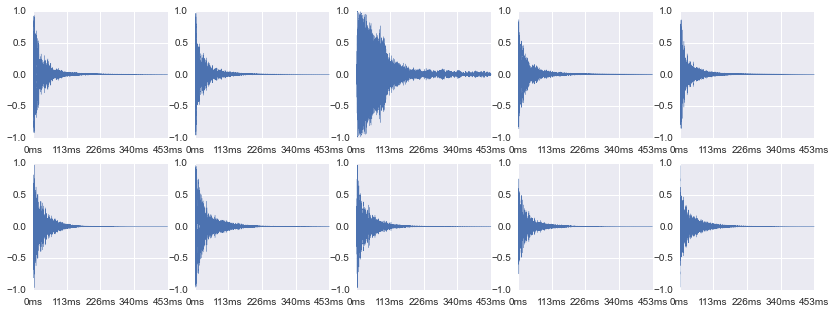

In [5]:
for i, x in enumerate(snare_signals):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

## Constructing a Feature Vector

A *feature vector* is simply a collection of features. Here is a simple function that constructs a two-dimensional feature vector from a signal:

In [6]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]

If we want to aggregate all of the feature vectors among signals in a collection, we can use a list comprehension as follows:

In [7]:
kick_features = numpy.array([extract_features(x) for x in kick_signals])
snare_features = numpy.array([extract_features(x) for x in snare_signals])

Visualize the differences in features by plotting separate histograms for each of the classes:

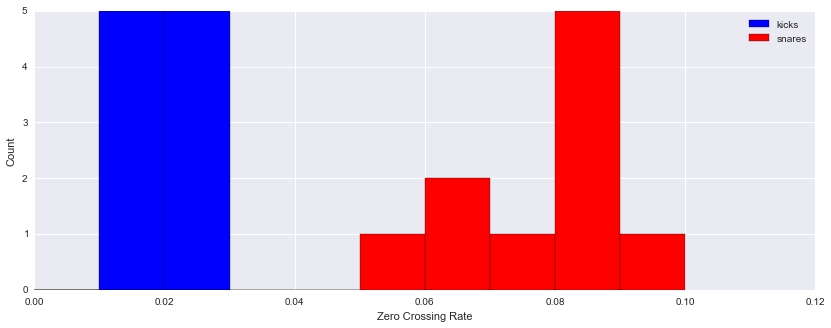

In [8]:
plt.hist(kick_features[:,0], color='b', range=(0, 0.1))
plt.hist(snare_features[:,0], color='r', range=(0, 0.1))
plt.legend(('kicks', 'snares'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

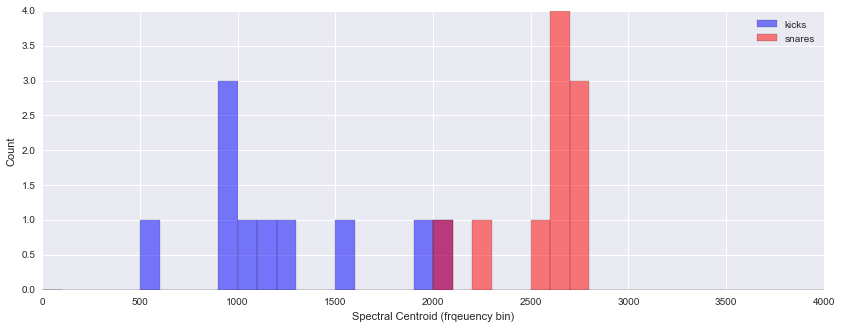

In [9]:
plt.hist(kick_features[:,1], color='b', range=(0, 4000), bins=40, alpha=0.5)
plt.hist(snare_features[:,1], color='r', range=(0, 4000), bins=40, alpha=0.5)
plt.legend(('kicks', 'snares'))
plt.xlabel('Spectral Centroid (frqeuency bin)')
plt.ylabel('Count')

## Feature Scaling

The features that we used in the previous example included zero crossing rate and spectral centroid. These two features are expressed using different units. This discrepancy can pose problems when performing classification later. Therefore, we will normalize each feature vector to a common range and store the normalization parameters for later use.  

Many techniques exist for scaling your features. For now, we'll use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).  `MinMaxScaler` returns an array of scaled values such that each feature dimension is in the range -1 to 1.

Let's concatenate all of our feature vectors into one *feature table*:

In [10]:
feature_table = numpy.vstack((kick_features, snare_features))
print feature_table.shape

(20, 2)


Scale each feature dimension to be in the range -1 to 1:

In [11]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print training_features.min(axis=0)
print training_features.max(axis=0)

[-1. -1.]
[ 1.  1.]


Plot the scaled features:

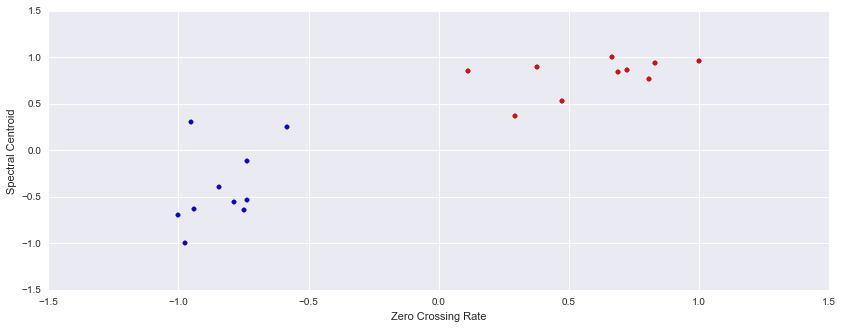

In [12]:
plt.scatter(training_features[:10,0], training_features[:10,1], c='b')
plt.scatter(training_features[10:,0], training_features[10:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

[&larr; Back to Index](index.html)